# 5, 6. PANDAS DATAFRAME

**EJERCICIOS:**

En primer lugar, será necesario que descarguéis del campus los datos que usaremos en estos ejercicios: el archivo csv llamado Pokemon.csv

Una vez tengáis descargado el archivo, subidlo al entorno de Colaboratory. Recordad que vimos como hacerlo mediante el menú de mano izquierda en los vídeos del primer tema para subirlo a local. Y que si preferís también tenéis la opción de guardar el archivo en vuestro Drive y montar una conexión a Drive para acceder a él.

Recordad que en cada pregunta, en caso de que lo necesitéis, podéis añadir las celdas de código que creáis conveniente.

1. Importa la librería de pandas y numpy

In [1]:
import pandas as pd
import numpy as np

2. Una vez hayas subido los datos con los que trabajaremos al entorno de Colab, importalos mediante la función read_csv y guárdalos en un dataframe llamado df

In [2]:
df = pd.read_csv("pokemon.csv")

3. Imprime las 10 primeras líneas de nuestro nuevo dataframe mediante la función head

In [3]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


4. Encuentra cuántas filas y columnas tiene df mediante la función shape

In [5]:
df.shape

(800, 13)

5. Obtén la información básica del dataframe mediante la función info. Fíjate en si hay alguna columna con elementos nulos, de que tipo son los datos de cada columna.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [14]:
df["Type 2"].isnull().sum()

386

6. Aplica la función drop_duplicates a df para eliminar duplicados si los hay. Luego imprime la shape del nuevo dataframe y mira si se han borrado duplicados. Si había duplicados, ahora debería haber menos filas en df.

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(800, 13)

En el ejercicio anterior te debería haber salido que no hay duplicados. Pero si nos fijamos en el ejercicio 3, cuándo hemos imprimido las 10 primeras filas de df vemos que hay elementos que tienen el mismo id en la columna '#', como el pokemon con '#'==3. Esto es porque la función drop_duplicates elimina aquellos registros (filas) que tienen  el mismo valor **en todas las columnas** que otro registro.


Si queremos un dataset sin megaevoluciones, deberemos eliminar las filas que tienen el id repetido en la columna '#' y quedarnos solo con la primera aparición de ese id. Para ello usaremos la función drop_duplicates especificando el parámetro subset=['column_name'] donde column_name será el nombre de la columna con duplicados que queremos tomar como referencia. En este caso el column_name será #

7. Quédate con una versión de df sin megaevoluciones, es decir, si hay más de un pokemon con el mismo número en la columna # quédate solo con su primera aparición. Y guárdala en un dataframe llamado sub_df

In [20]:
sub_df = df.drop_duplicates(subset=["#"])

8. Aplica la función head a sub_df para ver como ha quedado nuestro subdataset e imprime su shape para ver con cuántos registros nos hemos quedado.

In [25]:
sub_df.shape

(721, 13)

9. Aplica la función .nunique() a la columna '#' de df para ver cuántos valores únicos tenía. Este número deberá coincidir con el número de filas de sub_df

In [26]:
sub_df["#"].nunique()

721

10. Haz que la columna # ahora sea el index de sub_df, aplica la función .set_index() con inplace=True

In [29]:
sub_df.set_index("#",inplace=True)

Aplica la función head a sub_df para ver que has establecido el índice correctamente. A partir de aquí trabajaremos siempre con sub_df a nos ser que se indicara lo contrario.

In [30]:
sub_df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


11. Mira que columnas de sub_df tienen nulos y cuántos registros nulos tienen mediante la función isnull

In [35]:
sub_df.isnull().sum()

Name            0
Type 1          0
Type 2        371
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

12. Deberías haber obtenido que solamente tenemos nulos en la columna Type 2. Sustituye los nulos de Type 2 con la string 'No type 2', usa la función .fillna() y pásale un diccionario con key el nombre de la columna a la que queremos reemplazar los nulos, en este caso 'Type 2' y con value el valor por el que queremos reemplazar los nulos, en este caso 'No type 2'. Recuerda usar inplace=True para alterar el propio dataframe.

In [37]:
sub_df.fillna("No Type 2",inplace=True)

13. Imprime los nombres de las columnas. Luego renombra las columnas de manera que no contengan espacios y que todas sus letras sean minúsculas

In [40]:
sub_df.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [47]:
sub_df.columns = sub_df.columns.str.replace(" ","_")

In [48]:
sub_df.columns

Index(['Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp._Atk', 'Sp._Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

14. Cuántos pokemons legendarios hay en sub_df?

In [49]:
sub_df.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,Charmander,Fire,No Type 2,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,No Type 2,405,58,64,58,80,65,80,1,False


In [57]:
len(sub_df[sub_df["Legendary"]==True])

46

15. Encuentra cuántos pokemons hay de cada type1 y haz que se muestren en pantalla en orden, del tipo del que hay más pokemons al que hay menos

In [61]:
sub_df.Type_1.value_counts()

Water       105
Normal       93
Grass        66
Bug          63
Fire         47
Psychic      47
Rock         41
Electric     36
Ground       30
Poison       28
Dark         28
Fighting     25
Dragon       24
Ghost        23
Ice          23
Steel        22
Fairy        17
Flying        3
Name: Type_1, dtype: int64

16. Toma el código del ejercicio anterior, pero ahora guarda el resultado en un dataframe llamado pokemons_type1, que contenga type1 como índice y una columna llamada count donde se almacene la cuenta

In [65]:
pokemons_type1 = pd.DataFrame(sub_df.Type_1.value_counts())

In [66]:
pokemons_type1

,Type_1
Water,105
Normal,93
Grass,66
Bug,63
Fire,47
Psychic,47
Rock,41
Electric,36
Ground,30
Poison,28


17. En base a los ejercicios anteriores, cuál es el tipo de pokemon del que hay más de ellos? Cuál es el que hay menos?

Hay mas de agua y menos voladores

18. Cuál es la media de ataque y la media de defensa de los pokemons con type1 igual a Fire? Y de los pokemons con type1 igual a Water? 

In [77]:
sub_df[["Attack","Defense"]][sub_df["Type_1"]=="Fire"].mean()

Attack     82.212766
Defense    64.893617
dtype: float64

In [78]:
sub_df[["Attack","Defense"]][sub_df["Type_1"]=="Water"].mean()

Attack     71.047619
Defense    70.485714
dtype: float64

Quién tiene una media de ataque mayor, los pokemons de fuego o los de agua? Y una media de defensa mayor?

En ataque lso tipos fuego son superiores a los de tipo agua pero en la defensa pasa lo contrario

19. Calcula la media de ataque (attack) de los pokemons por tipo (type1). Es decir, queremos obtener un dataframe con índice type1 y una columna que contenga la media de attack para cada uno de estos type1

In [110]:
pokemons_type1

,Type_1,Attack
Water,105,71.047619
Normal,93,71.731183
Grass,66,70.909091
Bug,63,65.222222
Fire,47,82.212766
Psychic,47,61.276596
Rock,41,88.463415
Electric,36,67.777778
Ground,30,91.300000
Poison,28,74.678571


In [109]:
e=0
for i in pokemons_type1.index:
    pokemons_type1["Attack"][e]=sub_df[["Attack"]][sub_df["Type_1"]==i].mean()
    e+=1

C:\Users\Tao\AppData\Local\Temp\ipykernel_27344\580043013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemons_type1["Attack"][e]=sub_df[["Attack"]][sub_df["Type_1"]==i].mean()
C:\Users\Tao\AppData\Local\Temp\ipykernel_27344\580043013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemons_type1["Attack"][e]=sub_df[["Attack"]][sub_df["Type_1"]==i].mean()
C:\Users\Tao\AppData\Local\Temp\ipykernel_27344\580043013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

Cuál es el tipo de pokemon con mayor ataque medio? Y el de menor ataque medio?

In [116]:
pokemons_type1.sort_values("Attack")

,Type_1,Attack
Psychic,47,61.276596
Fairy,17,61.529412
Bug,63,65.222222
Ghost,23,66.652174
Electric,36,67.777778
Ice,23,70.695652
Grass,66,70.909091
Water,105,71.047619
Flying,3,71.666667
Normal,93,71.731183


Los Dragon en promedio tienen mayor ataque y los psiquicos el menor

20. Cuál es el pokemon con mayor hp?

In [128]:
sub_df[sub_df["HP"]==sub_df.HP.max()]

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
242,Blissey,Normal,No Type 2,540,255,10,10,75,135,55,2,False


21. Crea un dataframe con todos los pokemons con defensa (defense) superior a la media

In [132]:
sub_df_Defense = sub_df[sub_df["Defense"]>sub_df.Defense.mean()]

In [133]:
sub_df_Defense.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
8,Wartortle,Water,No Type 2,405,59,63,80,65,80,58,1,False
9,Blastoise,Water,No Type 2,530,79,83,100,85,105,78,1,False
18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,1,False


22. Cuántos pokemons de cada tipo (type1) hay en el dataframe del ejercicio anterior? Cuál es el tipo (type1) de pokemon que tiene más pokemons con defensa superior a la media?

In [134]:
sub_df_Defense.Type_1.value_counts()

Water       47
Rock        30
Grass       26
Bug         22
Normal      20
Steel       20
Ground      19
Fire        15
Dragon      14
Psychic     14
Poison      11
Ice         11
Fighting    10
Dark        10
Ghost       10
Electric     8
Fairy        7
Flying       1
Name: Type_1, dtype: int64

23. Crea una nueva columna llamada flag_type2 que contenga un 0 si en la columna type2 tenemos 'No type 2' y que contenga un 1 si en la columna type2 aparece otra cosa

In [148]:
sub_df_Defense["flag_type2"] = np.empty
sub_df_Defense["flag_type2"] = sub_df_Defense["Type_2"].apply(lambda x: 0 if x=='No Type 2' else 1)

C:\Users\Tao\AppData\Local\Temp\ipykernel_27344\1539088954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_Defense["flag_type2"] = np.empty
C:\Users\Tao\AppData\Local\Temp\ipykernel_27344\1539088954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_Defense["flag_type2"] = sub_df_Defense["Type_2"].apply(lambda x: 0 if x=='No Type 2' else 1)


In [149]:
sub_df_Defense

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary,flag_type2
#,,,,,,,,,,,,,
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,1
8,Wartortle,Water,No Type 2,405,59,63,80,65,80,58,1,False,0
9,Blastoise,Water,No Type 2,530,79,83,100,85,105,78,1,False,0
18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,Xerneas,Fairy,No Type 2,680,126,131,95,131,98,99,6,True,0
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True,1
718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,1


In [150]:
sub_df_Defense[sub_df_Defense["Type_2"]=="No Type 2"]

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary,flag_type2
#,,,,,,,,,,,,,
8,Wartortle,Water,No Type 2,405,59,63,80,65,80,58,1,False,0
9,Blastoise,Water,No Type 2,530,79,83,100,85,105,78,1,False,0
27,Sandshrew,Ground,No Type 2,300,50,75,85,20,30,40,1,False,0
28,Sandslash,Ground,No Type 2,450,75,100,110,45,55,65,1,False,0
36,Clefable,Fairy,No Type 2,483,95,70,73,95,90,60,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,Slurpuff,Fairy,No Type 2,480,82,80,86,85,75,72,6,False,0
693,Clawitzer,Water,No Type 2,500,71,73,88,120,89,59,6,False,0
712,Bergmite,Ice,No Type 2,304,55,69,85,32,35,28,6,False,0


24. Muestra los datos del pokemon 'Pikachu', y si tenías/tienes alguno preferido dame sus datos también

In [155]:
df[df["Name"]=="Pikachu"]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False


In [157]:
df[df["Name"]=="Mew"]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
165,151,Mew,Psychic,NaN,600,100,100,100,100,100,100,1,False


25. Imprime las estadísticas básicas de los pokemons con type1 igual a Grass y type2 igual a Poison (que cumplan las dos condiciones), mediante la función .describe()

In [167]:
df[(df["Type 1"]=="Grass") & (df["Type 2"]=="Poison")].describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,189.785714,399.000000,63.785714,68.428571,58.214286,84.642857,72.142857,51.785714,2.142857
std,222.461121,86.842917,19.407289,19.492461,15.967171,21.073524,20.164161,20.532071,1.657484
min,1.000000,280.000000,40.000000,30.000000,35.000000,50.000000,30.000000,15.000000,1.000000
25%,43.250000,318.500000,50.000000,56.250000,46.000000,71.250000,65.000000,40.000000,1.000000
50%,69.500000,397.500000,60.000000,67.500000,59.000000,85.000000,72.500000,52.500000,1.000000
75%,383.250000,483.500000,73.500000,81.500000,68.750000,100.000000,80.000000,63.750000,3.750000
max,591.000000,525.000000,114.000000,105.000000,85.000000,125.000000,105.000000,90.000000,5.000000


26. Imprime un scatter plot de la rapidez (speed) versus el ataque (attack). Recuerda importar la libreria matplotlib.pyplot

Text(0.5, 1.0, 'Attack and speed')

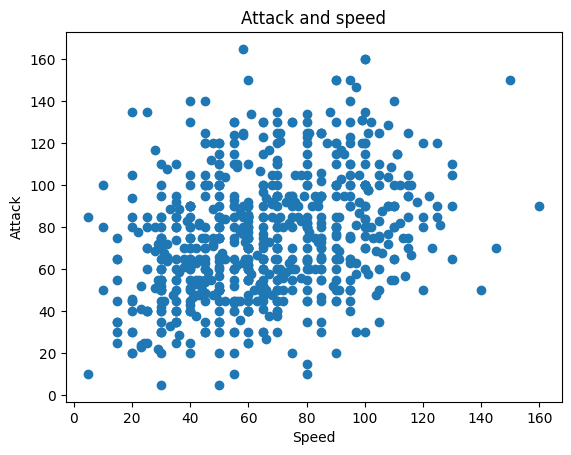

In [175]:
import matplotlib.pyplot as plt
plt.scatter(df["Speed"],df["Attack"])
plt.xlabel("Speed")
plt.ylabel("Attack")
plt.title("Attack and speed")

27. Muestra las distintas generaciones que encontramos en el dataframe sub_df

In [170]:
print(sub_df["Generation"].unique())

[1 2 3 4 5 6]
